<a href="https://colab.research.google.com/github/nataliamarinn/dm_grupo4/blob/main/NM_pruebas_nuestras_caras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***Código para lectura de imágenes y aplicación de CP***


En este notebook se realiza la lectura de imágenes desde una carpeta, se seleccionan fotos para training y testing, se recortan los rostros, se convierten a escala de grises y luego se aplica el **Análisis de componentes principales** (PCA)

In [1]:
#Clonar el repo para obtener los archivos
!git clone https://github.com/nataliamarinn/dm_grupo4.git


fatal: destination path 'dm_grupo4' already exists and is not an empty directory.


In [2]:

# ✅ Primero desinstalamos protobuf conflictivo
!pip uninstall -y protobuf

# ✅ Luego instalamos versiones compatibles
!pip install mediapipe==0.10.5 protobuf==3.20.3 opencv-python-headless

Found existing installation: protobuf 5.29.4
Uninstalling protobuf-5.29.4:
  Successfully uninstalled protobuf-5.29.4
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 33.5/33.5 MB 18.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.1/162.1 kB 10.6 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow-metadata 1.16.1 requires protobuf<6.0.0dev,>=4.25.2; python_version >= "3.11", but you have protobuf 3.20.3 which is incompatible.
grpcio-status 1.71.0 requires protobuf<6.0dev,>=5.26.1, but you have protobuf 3.20.3 which is incompatible.


In [6]:
#!pip install mediapipe --quiet


In [2]:
import os
import cv2
import numpy as np
import mediapipe as mp
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder


In [3]:
# Ruta donde están las carpetas de personas
input_folder = "/content/dm_grupo4/Eigenfaces"


In [4]:
# Inicializar MediaPipe FaceMesh
mp_face_mesh = mp.solutions.face_mesh
face_mesh = mp_face_mesh.FaceMesh(static_image_mode=True, refine_landmarks=True, max_num_faces=1)

# Puntos que delimitan la cara sin pelo/ropa
face_indices = [33, 133, 362, 263, 1, 2, 98, 327, 152, 10, 176, 397, 365, 379, 378, 400, 377]

In [5]:
# Almacenar imágenes procesadas y etiquetas
imagenes_procesadas = []
etiquetas = []

In [6]:
# Recorrer carpetas/personas
for persona in os.listdir(input_folder):
    carpeta = os.path.join(input_folder, persona)
    if os.path.isdir(carpeta):
        for archivo in os.listdir(carpeta):
            if archivo.lower().endswith((".jpg", ".jpeg", ".png")):
                path_img = os.path.join(carpeta, archivo)
                image = cv2.imread(path_img)
                if image is None:
                    continue

                h, w, _ = image.shape
                img_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
                results = face_mesh.process(img_rgb)

                if results.multi_face_landmarks:
                    landmarks = results.multi_face_landmarks[0].landmark
                    puntos = [(int(landmarks[i].x * w), int(landmarks[i].y * h)) for i in face_indices]

                    x_min = max(min(p[0] for p in puntos), 0)
                    x_max = min(max(p[0] for p in puntos), w)
                    y_min = max(min(p[1] for p in puntos), 0)
                    y_max = min(max(p[1] for p in puntos), h)

                    rostro = image[y_min:y_max, x_min:x_max]

                    if rostro.size == 0:
                        continue

                    # Convertir a escala de grises
                    rostro_gray = cv2.cvtColor(rostro, cv2.COLOR_BGR2GRAY)

                    # Guardar
                    imagenes_procesadas.append(rostro_gray)
                    etiquetas.append(persona)

print(f"✅ Total imágenes procesadas: {len(imagenes_procesadas)}")

✅ Total imágenes procesadas: 253


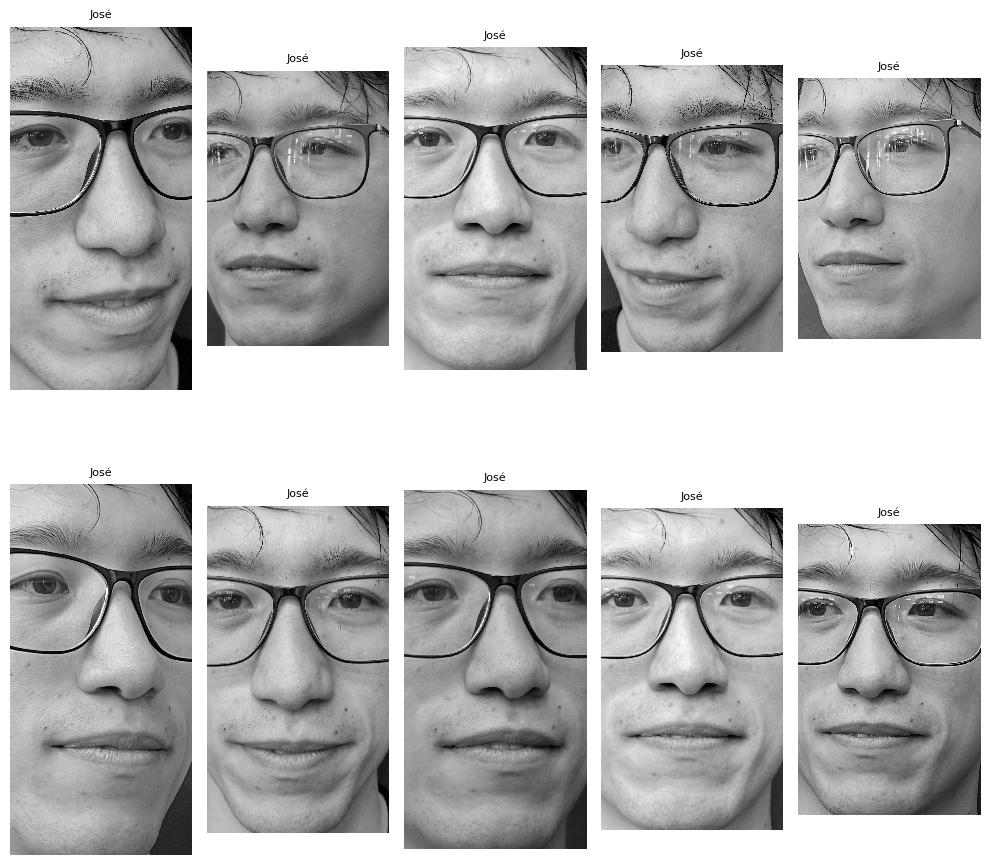

In [8]:
fig, axs = plt.subplots(2, 5, figsize=(10, 10))
for i, ax in enumerate(axs.flat):
    ax.imshow(imagenes_procesadas[i], cmap='gray', interpolation='nearest')
    ax.set_title(etiquetas[i], fontsize=8)
    ax.axis('off')
plt.tight_layout()
plt.show()
